In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


C:\Users\Netra\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7646 - loss: 0.6506 - val_accuracy: 0.8740 - val_loss: 0.3542
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8795 - loss: 0.3306 - val_accuracy: 0.8797 - val_loss: 0.3156
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9011 - loss: 0.2743 - val_accuracy: 0.8947 - val_loss: 0.2842
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9089 - loss: 0.2412 - val_accuracy: 0.8968 - val_loss: 0.2866
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9191 - loss: 0.2159 - val_accuracy: 0.9028 - val_loss: 0.2550
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9294 - loss: 0.1909 - val_accuracy: 0.9067 - val_loss: 0.2431
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9358 - loss: 0.1730 - val_accuracy: 0.9017 - val_loss: 0.2683
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9413 -

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9080 - loss: 0.2821

Test Accuracy: 0.9103


In [10]:
import numpy as np

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


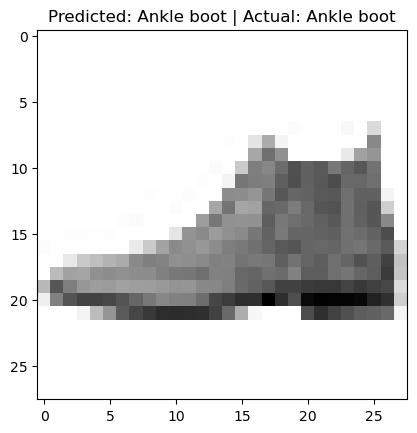

In [11]:
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {class_names[np.argmax(predictions[0])]} | Actual: {class_names[y_test[0]]}")
plt.show()